In [1]:
# import essentials
import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

#import dataset
from keras.datasets import fashion_mnist




from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Reshape, InputLayer, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import optimizers
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print("Training size:",y_train.size)
print("Testing size:",y_test.size)

Training size: 60000
Testing size: 10000


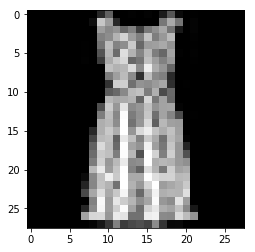

In [4]:
index = np.random.randint(10000)
img = x_train[index]
plt.imshow(img, cmap='gray')

In [5]:
#The input is a 1D-vector we transform it to a 2D-matrix
train_features = x_train.reshape((x_train.shape[0], 1, 28, 28))
test_features = x_test.reshape((x_test.shape[0], 1, 28, 28))

In [6]:
train_labels = np_utils.to_categorical(y_train)

# divide data into training and validation set
train_features, validation_features, train_labels, validation_labels = train_test_split(train_features, train_labels, 
                                                                           test_size=0.15, random_state=80)

In [7]:
print("Training size:",train_labels.size)
print("Validation size:",validation_labels.size)

Training size: 510000
Validation size: 90000


# Expérience 1:

In [34]:
# hyperparameters
epochs = 10
batch_size = 200

# build model2
n_classes = 10
model = Sequential()


# input layer
model.add(InputLayer(input_shape=(1, 28, 28)))

#normalisation
model.add(BatchNormalization())

#Layer 1&2&3&4
model.add(Flatten())
model.add(Dense(units=512, activation='relu'  ))
model.add(Dense(units=256, activation='relu'  ))
model.add(Dense(units=128, activation='relu'  ))

model.add(Dense(units=64, activation='relu'  ))

model.add(Dense(n_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_10 (Batc (None, 1, 28, 28)         112       
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total para

In [35]:
# compile the model
model.compile(optimizer= 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
training = model.fit(train_features, train_labels,
                     validation_data=(validation_features, validation_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 8s 164us/step - loss: 0.4789 - acc: 0.8292 - val_loss: 0.3730 - val_acc: 0.8650
Epoch 2/10
51000/51000 [==============================] - 8s 156us/step - loss: 0.3339 - acc: 0.8777 - val_loss: 0.3405 - val_acc: 0.8758
Epoch 3/10
51000/51000 [==============================] - 8s 163us/step - loss: 0.2930 - acc: 0.8912 - val_loss: 0.3143 - val_acc: 0.8864
Epoch 4/10
51000/51000 [==============================] - 8s 153us/step - loss: 0.2617 - acc: 0.9022 - val_loss: 0.3126 - val_acc: 0.8856
Epoch 5/10
51000/51000 [==============================] - 8s 152us/step - loss: 0.2392 - acc: 0.9098 - val_loss: 0.3209 - val_acc: 0.8840
Epoch 6/10
51000/51000 [==============================] - 8s 152us/step - loss: 0.2191 - acc: 0.9183 - val_loss: 0.3100 - val_acc: 0.8884
Epoch 7/10
51000/51000 [==============================] - 8s 150us/step - loss: 0.2017 - acc: 0.9235 - val_loss: 0.3193 - v

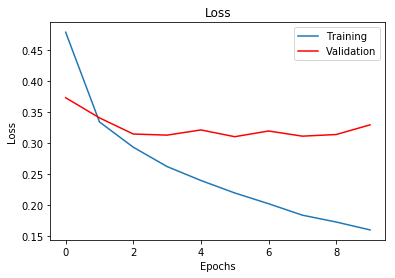

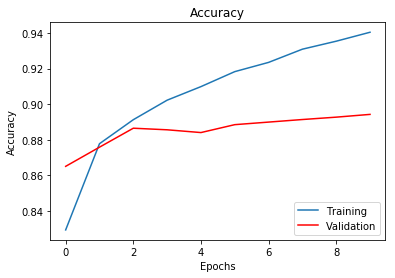

In [37]:
# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [38]:
test_labels = y_test
pred = model.predict(test_features)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)

In [39]:
accuracy_score(test_labels, pred_digits)

0.8862

# Expérience 2 

In [44]:
# hyperparameters
epochs = 10
batch_size = 200

# build model2
n_classes = 10
model = Sequential()


# input layer
model.add(InputLayer(input_shape=(1, 28, 28)))
#normalisation
model.add(BatchNormalization())

#Layer 1&2&3&4
model.add(Flatten())
model.add(Dense(units=512, activation='relu'  ))
model.add(Dropout(0.35))
model.add(Dense(units=256, activation='relu'  ))
model.add(Dropout(0.35))
model.add(Dense(units=128, activation='relu'  ))
model.add(Dropout(0.35))
model.add(Dense(units=64, activation='relu'  ))
model.add(Dropout(0.35))
model.add(Dense(n_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 1, 28, 28)         112       
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
__________

In [45]:
# compile the model
model.compile(optimizer= 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
training = model.fit(train_features, train_labels,
                     validation_data=(validation_features, validation_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 9s 184us/step - loss: 0.8284 - acc: 0.7125 - val_loss: 0.4364 - val_acc: 0.8463
Epoch 2/10
51000/51000 [==============================] - 8s 164us/step - loss: 0.5239 - acc: 0.8252 - val_loss: 0.3894 - val_acc: 0.8584
Epoch 3/10
51000/51000 [==============================] - 8s 166us/step - loss: 0.4614 - acc: 0.8446 - val_loss: 0.3661 - val_acc: 0.8688
Epoch 4/10
51000/51000 [==============================] - 9s 167us/step - loss: 0.4222 - acc: 0.8558 - val_loss: 0.3627 - val_acc: 0.8656
Epoch 5/10
51000/51000 [==============================] - 9s 169us/step - loss: 0.3998 - acc: 0.8638 - val_loss: 0.3524 - val_acc: 0.8751
Epoch 6/10
51000/51000 [==============================] - 8s 166us/step - loss: 0.3771 - acc: 0.8704 - val_loss: 0.3316 - val_acc: 0.8820
Epoch 7/10
51000/51000 [==============================] - 9s 168us/step - loss: 0.3597 - acc: 0.8769 - val_loss: 0.3280 - v

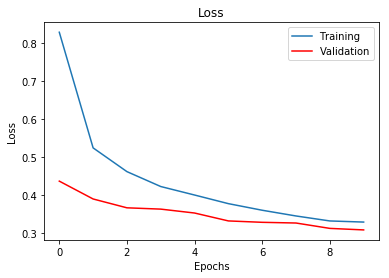

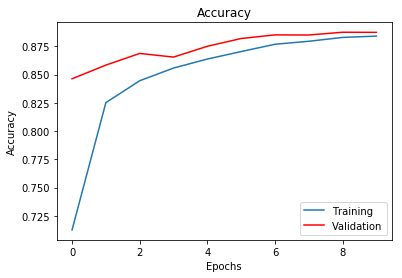

In [47]:
# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [48]:
test_labels = y_test
pred = model.predict(test_features)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)

In [49]:
accuracy_score(test_labels, pred_digits)

0.8767

# Expérience 3:

In [19]:
# hyperparameters
epochs = 10
batch_size = 200

# build model2
n_classes = 10
model = Sequential()


# input layer
model.add(InputLayer(input_shape=(1, 28, 28)))

#normalisation
model.add(BatchNormalization())

#Layer1
model.add(Conv2D(40, kernel_size=5, padding="same",input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#Layer 2 & 3
model.add(Conv2D(70, kernel_size=3, padding="same", activation = 'relu'))
model.add(Conv2D(200, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#layer 4
model.add(Conv2D(250, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


#Layer 5 & 6 & 7
model.add(Flatten())
model.add(Dense(units=100, activation='relu'  ))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dense(n_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 40, 28, 28)        1040      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 40, 14, 14)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 70, 14, 14)        25270     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 200, 14, 14)       126200    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 200, 7, 7)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 250, 5, 5)         450250    
__________

In [25]:
# compile the model
model.compile(optimizer= 'sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
training = model.fit(train_features, train_labels,
                     validation_data=(validation_features, validation_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 411s 8ms/step - loss: 1.8629 - acc: 0.4201 - val_loss: 1.0043 - val_acc: 0.6321
Epoch 2/10
51000/51000 [==============================] - 421s 8ms/step - loss: 0.8409 - acc: 0.6907 - val_loss: 0.8122 - val_acc: 0.7037
Epoch 3/10
51000/51000 [==============================] - 404s 8ms/step - loss: 0.7004 - acc: 0.7386 - val_loss: 0.6637 - val_acc: 0.7541
Epoch 4/10
51000/51000 [==============================] - 401s 8ms/step - loss: 0.6324 - acc: 0.7632 - val_loss: 0.5944 - val_acc: 0.7817
Epoch 5/10
51000/51000 [==============================] - 403s 8ms/step - loss: 0.5836 - acc: 0.7824 - val_loss: 0.5752 - val_acc: 0.7878
Epoch 6/10
51000/51000 [==============================] - 402s 8ms/step - loss: 0.5460 - acc: 0.7951 - val_loss: 0.5335 - val_acc: 0.8036
Epoch 7/10
51000/51000 [==============================] - 393s 8ms/step - loss: 0.5086 - acc: 0.8100 - val_loss: 0.4847 - v

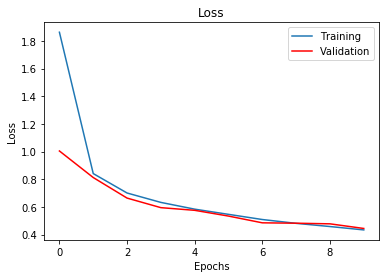

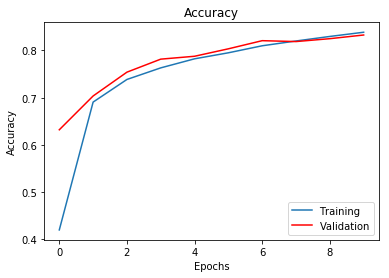

In [27]:
# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [28]:
test_labels = y_test
pred = model.predict(test_features)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)

In [29]:
accuracy_score(test_labels, pred_digits)

0.8264

test 2

In [40]:
# hyperparameters
epochs = 10
batch_size = 200

# build model2
n_classes = 10
model = Sequential()


# input layer
model.add(InputLayer(input_shape=(1, 28, 28)))
#normalisation
model.add(BatchNormalization())

#Layer 1 & 2 & 3 & 4
model.add(Flatten())
model.add(Dense(units=128, activation='relu'  ))
model.add(Dense(units=128, activation='relu'  ))
model.add(Dense(units=128, activation='relu'  ))

model.add(Dense(units=64, activation='relu'  ))

model.add(Dense(n_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 142,410
Trainable params: 142,410
Non-trainable params: 0
_________________________________________________________________
None

In [41]:
# compile the model
model.compile(optimizer= 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
training = model.fit(train_features, train_labels,
                     validation_data=(validation_features, validation_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 2s 42us/step - loss: 13.4055 - acc: 0.1675 - val_loss: 13.2592 - val_acc: 0.1772
Epoch 2/10
51000/51000 [==============================] - 1s 29us/step - loss: 13.4271 - acc: 0.1667 - val_loss: 13.1577 - val_acc: 0.1837
Epoch 3/10
51000/51000 [==============================] - 1s 28us/step - loss: 13.2488 - acc: 0.1780 - val_loss: 13.1954 - val_acc: 0.1813
Epoch 4/10
51000/51000 [==============================] - 1s 28us/step - loss: 13.2927 - acc: 0.1753 - val_loss: 13.1585 - val_acc: 0.1836
Epoch 5/10
51000/51000 [==============================] - 2s 29us/step - loss: 13.5703 - acc: 0.1580 - val_loss: 13.8150 - val_acc: 0.1429
Epoch 6/10
51000/51000 [==============================] - 1s 29us/step - loss: 13.3901 - acc: 0.1692 - val_loss: 13.1721 - val_acc: 0.1828
Epoch 7/10
51000/51000 [==============================] - 2s 31us/step - loss: 13.2523 - acc: 0.1778 - val_loss: 14.1

# Expérience 4

In [32]:
# hyperparameters
epochs = 10
batch_size = 200

# build model2
n_classes = 10
model = Sequential()


# input layer
model.add(InputLayer(input_shape=(1, 28, 28)))
#normalisation
model.add(BatchNormalization())

#Layer1
model.add(Conv2D(40, kernel_size=5, padding="same",input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#Layer 2 & 3
model.add(Conv2D(70, kernel_size=3, padding="same", activation = 'relu'))
model.add(Conv2D(200, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#layer 4
model.add(Conv2D(250, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


#Layer 5 & 6 & 7
model.add(Flatten())
model.add(Dense(units=180, activation='relu'  ))
model.add(Dropout(0.35))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.35))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.35))
model.add(Dense(n_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 40, 28, 28)        1040      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 40, 14, 14)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 70, 14, 14)        25270     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 200, 14, 14)       126200    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 200, 7, 7)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 250, 5, 5)         450250    
__________

In [33]:
# compile the model
model.compile(optimizer= 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
training = model.fit(train_features, train_labels,
                     validation_data=(validation_features, validation_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 457s 9ms/step - loss: 0.8617 - acc: 0.6880 - val_loss: 0.4134 - val_acc: 0.8588
Epoch 2/10
51000/51000 [==============================] - 445s 9ms/step - loss: 0.4438 - acc: 0.8467 - val_loss: 0.3422 - val_acc: 0.8784
Epoch 3/10
51000/51000 [==============================] - 413s 8ms/step - loss: 0.3595 - acc: 0.8778 - val_loss: 0.2951 - val_acc: 0.8959
Epoch 4/10
51000/51000 [==============================] - 476s 9ms/step - loss: 0.3098 - acc: 0.8923 - val_loss: 0.2798 - val_acc: 0.9007
Epoch 5/10
51000/51000 [==============================] - 414s 8ms/step - loss: 0.2764 - acc: 0.9033 - val_loss: 0.2576 - val_acc: 0.9106
Epoch 6/10
51000/51000 [==============================] - 398s 8ms/step - loss: 0.2509 - acc: 0.9139 - val_loss: 0.2434 - val_acc: 0.9141
Epoch 7/10
51000/51000 [==============================] - 400s 8ms/step - loss: 0.2299 - acc: 0.9194 - val_loss: 0.2474 - v

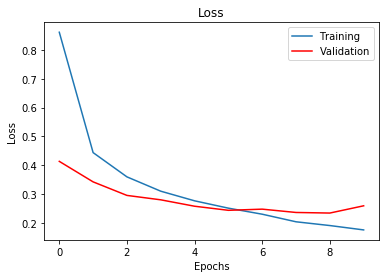

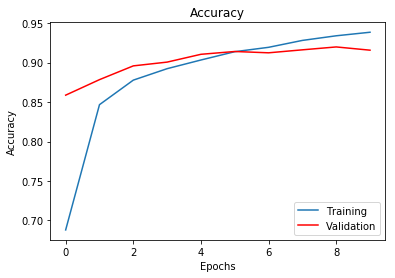

In [35]:
# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [36]:
test_labels = y_test
pred = model.predict(test_features)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)

In [37]:
accuracy_score(test_labels, pred_digits)

0.9092

# Expérience 5:

In [25]:
# hyperparameters
epochs = 10
batch_size = 256

# build model2
n_classes = 10
model = Sequential()


# input layer
model.add(InputLayer(input_shape=(1, 28, 28)))
#normalisation
model.add(BatchNormalization())

#Layer1
model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


#layer 2
model.add(Conv2D(128, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


#Layer 3 & 4
model.add(Conv2D(256, kernel_size=3, padding="same", activation = 'relu'))
model.add(Conv2D(256, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


#Layer 5&6
model.add(Conv2D(512, kernel_size=3, padding="same", activation = 'relu'))
model.add(Conv2D(512, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))






#Layer 7 & 8 & 9
model.add(Flatten())
model.add(Dense(units=256, activation='relu'  ))
model.add(Dropout(0.35))
model.add(Dense(units=128, activation='relu'  ))
model.add(Dropout(0.35))
model.add(Dense(units=64, activation='relu'  ))
model.add(Dropout(0.35))
model.add(Dense(n_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 64, 28, 28)        640       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 64, 14, 14)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 128, 12, 12)       73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 128, 6, 6)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 256, 6, 6)         295168    
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 256, 6, 6)         590080    
__________

In [26]:
# compile the model
model.compile(optimizer= 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
training = model.fit(train_features, train_labels,
                     validation_data=(validation_features, validation_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 864s 17ms/step - loss: 1.7609 - acc: 0.3929 - val_loss: 0.7223 - val_acc: 0.7276
Epoch 2/10
51000/51000 [==============================] - 907s 18ms/step - loss: 0.7126 - acc: 0.7455 - val_loss: 0.5419 - val_acc: 0.7921
Epoch 3/10
51000/51000 [==============================] - 899s 18ms/step - loss: 0.5558 - acc: 0.8002 - val_loss: 0.4841 - val_acc: 0.8137
Epoch 4/10
51000/51000 [==============================] - 996s 20ms/step - loss: 0.4757 - acc: 0.8269 - val_loss: 0.4058 - val_acc: 0.8409
Epoch 5/10
51000/51000 [==============================] - 941s 18ms/step - loss: 0.4243 - acc: 0.8475 - val_loss: 0.3530 - val_acc: 0.8704
Epoch 6/10
51000/51000 [==============================] - 903s 18ms/step - loss: 0.3661 - acc: 0.8756 - val_loss: 0.3387 - val_acc: 0.8743
Epoch 7/10
51000/51000 [==============================] - 853s 17ms/step - loss: 0.3323 - acc: 0.8856 - val_loss: 0.2

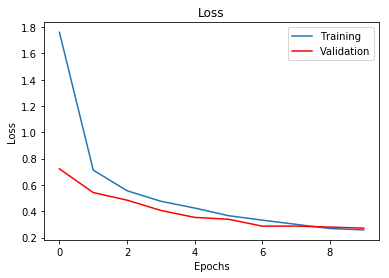

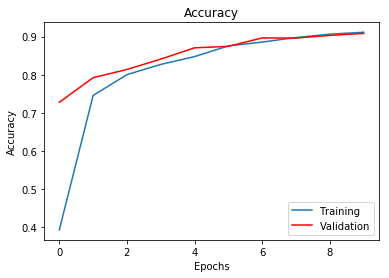

In [28]:
# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [29]:
test_labels = y_test
pred = model.predict(test_features)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)

In [30]:
accuracy_score(test_labels, pred_digits)

0.9062

# Expérience 6:

In [50]:
# hyperparameters
epochs = 10
batch_size = 256

# build model2
n_classes = 10
model = Sequential()


# input layer
model.add(InputLayer(input_shape=(1, 28, 28)))

#normalisation
model.add(BatchNormalization())

#Layer1
model.add(Conv2D(64, kernel_size=2, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.35))

#layer 2
model.add(Conv2D(32, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.35))






#Layer 3
model.add(Flatten())
model.add(Dense(units=256, activation='relu'  ))
model.add(Dropout(0.35))

model.add(Dense(n_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_13 (Batc (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 64, 28, 28)        320       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 64, 14, 14)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 64, 14, 14)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 12, 12)        18464     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 32, 6, 6)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 6, 6)          0         
__________

In [51]:
# compile the model
model.compile(optimizer= 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
training = model.fit(train_features, train_labels,
                     validation_data=(validation_features, validation_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 350s 7ms/step - loss: 0.6630 - acc: 0.7567 - val_loss: 0.3979 - val_acc: 0.8612
Epoch 2/10
51000/51000 [==============================] - 339s 7ms/step - loss: 0.4243 - acc: 0.8467 - val_loss: 0.3414 - val_acc: 0.8792
Epoch 3/10
51000/51000 [==============================] - 348s 7ms/step - loss: 0.3745 - acc: 0.8635 - val_loss: 0.3183 - val_acc: 0.8828
Epoch 4/10
51000/51000 [==============================] - 344s 7ms/step - loss: 0.3445 - acc: 0.8739 - val_loss: 0.2908 - val_acc: 0.8972
Epoch 5/10
51000/51000 [==============================] - 346s 7ms/step - loss: 0.3258 - acc: 0.8819 - val_loss: 0.2764 - val_acc: 0.9001
Epoch 6/10
51000/51000 [==============================] - 331s 6ms/step - loss: 0.3047 - acc: 0.8886 - val_loss: 0.2712 - val_acc: 0.9004
Epoch 7/10
51000/51000 [==============================] - 340s 7ms/step - loss: 0.2923 - acc: 0.8927 - val_loss: 0.2550 - v

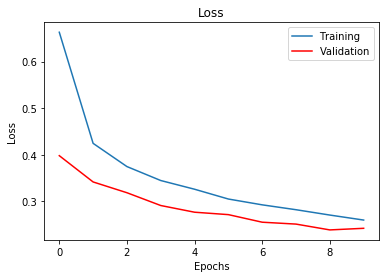

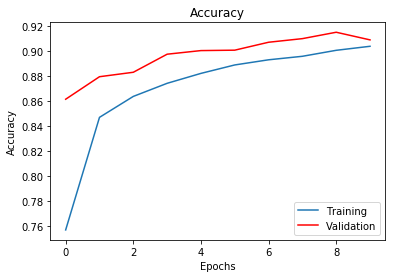

In [53]:
# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [54]:
test_labels = y_test
pred = model.predict(test_features)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)

In [55]:
accuracy_score(test_labels, pred_digits)

0.9071

# Expérience 7:

In [9]:
# hyperparameters
epochs = 10
batch_size = 20

# build model2
n_classes = 10
model = Sequential()


# input layer
model.add(InputLayer(input_shape=(1, 28, 28)))

#normalisation
model.add(BatchNormalization())

#Layer1
model.add(Conv2D(64, kernel_size=2, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.35))

#layer 2
model.add(Conv2D(32, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.35))






#Layer 3
model.add(Flatten())
model.add(Dense(units=256, activation='relu'  ))
model.add(Dropout(0.35))

model.add(Dense(n_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 28, 28)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 14, 14)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 12, 12)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 6, 6)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 6, 6)          0         
__________

In [10]:
# compile the model
model.compile(optimizer= 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
training = model.fit(train_features, train_labels,
                     validation_data=(validation_features, validation_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 420s 8ms/step - loss: 0.5210 - acc: 0.8117 - val_loss: 0.3310 - val_acc: 0.8821
Epoch 2/10
51000/51000 [==============================] - 428s 8ms/step - loss: 0.3725 - acc: 0.8636 - val_loss: 0.3031 - val_acc: 0.8908
Epoch 3/10
51000/51000 [==============================] - 414s 8ms/step - loss: 0.3361 - acc: 0.8770 - val_loss: 0.2811 - val_acc: 0.8953
Epoch 4/10
51000/51000 [==============================] - 435s 9ms/step - loss: 0.3167 - acc: 0.8838 - val_loss: 0.2578 - val_acc: 0.9043
Epoch 5/10
51000/51000 [==============================] - 433s 8ms/step - loss: 0.3026 - acc: 0.8871 - val_loss: 0.2616 - val_acc: 0.8991
Epoch 6/10
51000/51000 [==============================] - 436s 9ms/step - loss: 0.2927 - acc: 0.8936 - val_loss: 0.2803 - val_acc: 0.8963
Epoch 7/10
51000/51000 [==============================] - 432s 8ms/step - loss: 0.2845 - acc: 0.8942 - val_loss: 0.2495 - v

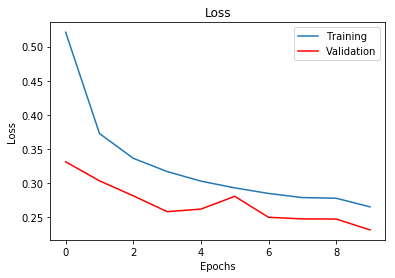

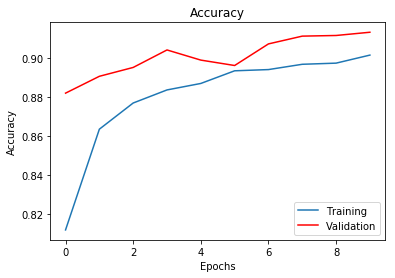

In [12]:
# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [13]:
test_labels = y_test
pred = model.predict(test_features)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)

In [14]:
accuracy_score(test_labels, pred_digits)

0.9099